## Final Project Submission

Please fill out:
* Student name: Brian Nderu
* Student pace:  full time
* Scheduled project review date/time: 12/3/2023
* Instructor name: William Okomba
* Blog post URL:


In [21]:
# Let us first start by importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

%matplotlib inline

LOADING THE DATA FILES 

In [22]:
#loading the csv file
movie = pd.read_csv("bom.movie_gross.csv")

In [23]:
#loading the database
conn= sqlite3.connect("im.db")

### UNDERSTANDING THE DATA

first we want to understand the Movie dataset

In [24]:
movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [25]:
movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
movie.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [27]:
movie.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [28]:
movie.shape

(3387, 5)

In [29]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [30]:
movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [31]:
movie.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

From the above information, we can understand there are missing values in studio, domestic_gross and foreign_gross columns. Additionally, we understand the mean of the movie data and the median data. This enables us to slightly understand the distribution of the dataset

UNDERSTANDING THE DATA FOR THE IM.DB DATASET

since this is a databse, well use sqlite3 to understand the data

In [32]:
#First we want to fetch  the table names from the data base
df= pd.read_sql('''SELECT name
            FROM sqlite_master
            WHERE type='table';
            ''', conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


We now want to understand columns that each table contains from the 8 tables in the database

In [33]:
#understanding the directors table
directors=pd.read_sql('''SELECT *
                FROM directors
                ;''', conn).head()

In [34]:
#understanding the movie basics table
movie_basic=pd.read_sql('''SELECT *
                            FROM movie_basics;
                            ''', conn)
movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
#understanding the known for table
known_for= pd.read_sql('''SELECT *
                            FROM known_for;
                            ''', conn)
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [36]:
#understanding movie_akas table
movie_akas= pd.read_sql(''' SELECT *
                            FROM movie_akas;
                             ''', conn )
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [37]:
#understanding movie_ratings table
movie_ratings= pd.read_sql('''SELECT *
                                FROM movie_ratings;
                                ''', conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [38]:
#understanding persons table
persons=pd.read_sql(''' SELECT *
                        FROM persons;
                        ''', conn)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [39]:
#understanding principals table
principals= pd.read_sql('''SELECT *
                            FROM principals;
                            ''', conn)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [40]:
#understanding the writers table
writers= pd.read_sql('''SELECT *
                        FROM writers;
                        ''', conn)
writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


we now have an understanding of what eaxch table contains and som relation between different tables.

### DATA CLEANING

cleaning of the movie data set

In [41]:
#null values
movie.isnull()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [42]:
movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

we see foreign_gross has 1350 missing values in its column, 28 and 5 for domestic_gross and studio respectively

In [43]:
#we create a function to replace the text values to integers
def column_text_to_integer(df, column):
    df[column]= df[column].apply(pd.to_numeric, errors="coerce")
    return df[column]

In [44]:
#let us convert for the foreign_gross column
column_text_to_integer(movie, "foreign_gross")

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [45]:
#mean for foreign_gross
mean_foreign_gross= movie.foreign_gross.mean()
mean_foreign_gross

75057041.62549213

In [46]:
#median for foreign_gross
median_foreign_gross= movie.foreign_gross.median()
median_foreign_gross

18900000.0

In [47]:
#median for domestic_gross
median_domestic_gross= movie.domestic_gross.median()
median_domestic_gross

1400000.0

In [48]:
#we create a function to find outliers
def outliers(data):
    q3=data.quantile(0.75)
    q1=data.quantile(0.25)
    IQR= q3 - q1
    outliers= data[(data < (q1- 1.5*IQR)) | (data > (q3 + 1.5*IQR))]
    return outliers


In [49]:
#outliers in the foreign_gross
outliers(movie.foreign_gross).count()

260

In [50]:
#outliers in domestic_gross
outliers(movie.domestic_gross).count()

406

let us relace the missing values in foreign_gross and domestic gross with their median

In [51]:
movie.foreign_gross.fillna(median_foreign_gross, inplace=True)

In [52]:
movie.domestic_gross.fillna(median_domestic_gross, inplace=True)

let us drop the missing values studio since we cant replace the crucial data

In [53]:
movie.dropna(inplace=True)

In [54]:
movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Cleaning of the IM.DB data set

The movie rating and the moving basics are the important tables in the data set so we join them

In [55]:
movie_basics_rating= pd.read_sql('''SELECT *
                                            FROM movie_ratings
                                            JOIN movie_basics
                                            USING (movie_id);
                                            ''', conn)
movie_basics_rating.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [56]:
movie_rating_writers= pd.read_sql('''SELECT *
                                            FROM movie_ratings
                                            JOIN writers
                                            USING (movie_id);
                                            ''', conn)
movie_rating_writers

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm3057599
1,tt10356526,8.3,31,nm4179342
2,tt1042974,6.4,20,nm1915232
3,tt1043726,4.2,50352,nm0001317
4,tt1043726,4.2,50352,nm0316417
...,...,...,...,...
169298,tt9708284,4.9,19,nm2203315
169299,tt9708284,4.9,19,nm2628394
169300,tt9722952,7.0,6,nm7620676
169301,tt9844256,7.5,24,nm0849465


In [57]:
#Let us rename averagerating to average_rating
movie_basics_rating.columns=movie_basics_rating.columns.str.lower().str.replace("averagerating", "average_rating")
movie_rating_writers.columns=movie_rating_writers.columns.str.lower().str.replace("averagerating", "average_rating")

In [58]:
movie_basics_rating

,movie_id,average_rating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [59]:
movie_rating_writers

,movie_id,average_rating,numvotes,person_id
0,tt10356526,8.3,31,nm3057599
1,tt10356526,8.3,31,nm4179342
2,tt1042974,6.4,20,nm1915232
3,tt1043726,4.2,50352,nm0001317
4,tt1043726,4.2,50352,nm0316417
...,...,...,...,...
169298,tt9708284,4.9,19,nm2203315
169299,tt9708284,4.9,19,nm2628394
169300,tt9722952,7.0,6,nm7620676
169301,tt9844256,7.5,24,nm0849465


In [60]:
#let us check for number of null values in each table
movie_rating_writers.isnull().sum()

movie_id          0
average_rating    0
numvotes          0
person_id         0
dtype: int64

In [61]:
movie_basics_rating.isnull().sum()

movie_id              0
average_rating        0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [62]:
movie_basics_rating.isnull()

,movie_id,average_rating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
73851,False,False,False,False,False,False,False,False
73852,False,False,False,False,False,False,False,False
73853,False,False,False,False,False,False,True,False
73854,False,False,False,False,False,False,False,False


In [63]:
#let us replace the null values in the genre column with unavailable since we cannot guess the genre
movie_basics_rating.genres.fillna("unavailable", inplace=True)

In [64]:
movie_basics_rating

,movie_id,average_rating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [65]:
#let us drop the missing values in running time
movie_basics_rating.dropna(inplace=True)

In [66]:
movie_basics_rating.isnull().sum()

movie_id           0
average_rating     0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [67]:
#checking for duplicates
movie_basics_rating.duplicated().sum()

0

In [68]:
movie_rating_writers.duplicated().sum()

57451

In [69]:
movie_rating_writers.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
169298    False
169299    False
169300    False
169301    False
169302    False
Length: 169303, dtype: bool

In [70]:
movie_rating_writers.drop_duplicates(inplace=True)
movie_rating_writers.duplicated().sum()

0

since no duplicates or missing values we can proceed to analyze the data

### DATA ANALYSIS

ANALYSIS FOR THE MOVIE DATA SET

In [71]:
movie.describe()

,domestic_gross,foreign_gross,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.856106e+07,5.262386e+07,2013.959787
std,6.679161e+07,1.100744e+08,2.477735
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.230000e+05,1.190000e+07,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.767500e+07,2.917500e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [72]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


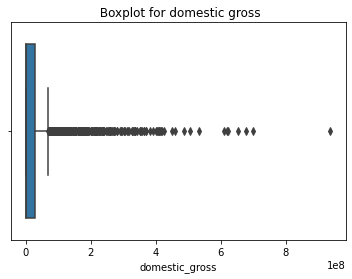

In [73]:
#plotting a boxplot for domestic_gross and foreign_gross to check outliers
fig, ax = plt.subplots()
sns.boxplot(movie.domestic_gross)
ax.set_title(" Boxplot for domestic gross")
plt.show()

c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


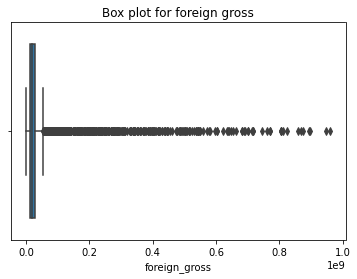

In [74]:
fig, ax= plt.subplots()
sns.boxplot(movie.foreign_gross)
ax.set_title("Box plot for foreign gross")
plt.show()

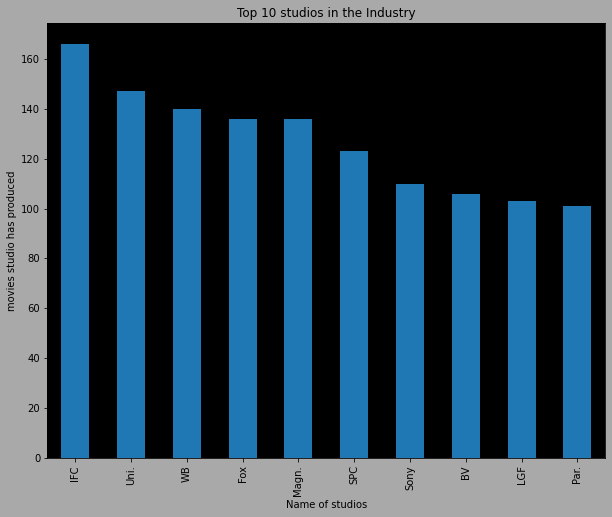

In [75]:
#we want to see which are the top 10 studios
fig, ax= plt.subplots(figsize= (10, 8))
movie.studio.value_counts().head(10).plot.bar()
plt.xlabel("Name of studios", color= "black")
plt.ylabel("movies studio has produced", color="black")
plt.title("Top 10 studios in the Industry", color="black")
ax.set_facecolor("black")
fig.patch.set_facecolor("darkgrey");

Finding the measures of central tendancies for the Movie dataset

In [76]:
#We create a function for calculating mean
def mean(data):
    mean= sum(data)/ len(data)
    return mean
print("The mean for domestic gross is :", mean(movie.domestic_gross))
print("The mean for foreign gross is : ", mean(movie.foreign_gross))

The mean for domestic gross is : 28561064.15730337
The mean for foreign gross is :  52623864.15819042


In [77]:
#we create a function for calculating median
def median(data):
    sorted_data= sorted(data)
    data_length= len(sorted_data)
    middle_number= (data_length-1) // 2
    if middle_number % 2:
        return sorted_data[middle_number]
    else:
        return (sorted_data[middle_number] + sorted_data[middle_number+1])/2
    
print("The median for domestic gross is : ", median(movie.domestic_gross))
print("The median for foreign gross is : ", median(movie.foreign_gross))

The median for domestic gross is :  1400000.0
The median for foreign gross is :  18900000.0


In [78]:
# we create a determine the mode 
print("The most occuring revenue for domestic gross is : ", (movie.domestic_gross).mode() )
print("The most occuring revenue for foreign gross is : ", (movie.foreign_gross).mode())

The most occuring revenue for domestic gross is :  0    1400000.0
dtype: float64
The most occuring revenue for foreign gross is :  0    18900000.0
dtype: float64


In [79]:
#determining the range
print("domestic gross : ", movie.domestic_gross.max() - movie.domestic_gross.min())
print(" Foreign gross : ", movie.foreign_gross.max() - movie.foreign_gross.min())

domestic gross :  936699900.0
 Foreign gross :  960499400.0


In [80]:
#determining the standard deviation
print("Standard deviation for Domestic gross is : ", movie.domestic_gross.std())
print("Standard deciation for foreign gross is : ", movie.foreign_gross.std())

Standard deviation for Domestic gross is :  66791614.601031914
Standard deciation for foreign gross is :  110074384.71875076


In [81]:
#determing variance
print("Variance for domestic gross is : ", movie.domestic_gross.var())
print("Variance for foreign gross is : ", movie.foreign_gross.var()) 

Variance for domestic gross is :  4461119781012780.0
Variance for foreign gross is :  1.211637017121155e+16


c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Brian\anaconda3\New folder\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


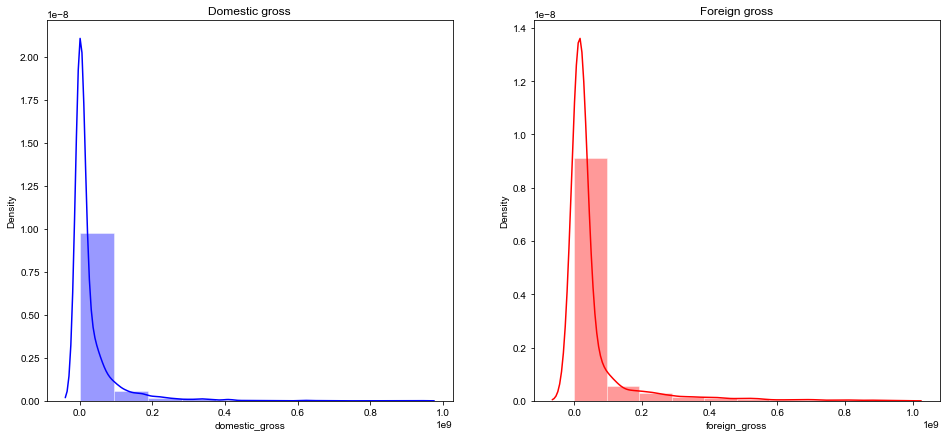

In [82]:
#plotting a histogram
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (16, 7))
sns.set_style("darkgrid")
sns.distplot(movie.domestic_gross, ax=ax1, color="blue", bins= 10)
sns.distplot(movie.foreign_gross, ax=ax2, color="red", bins=10)
ax1.set_title("Domestic gross")
ax2.set_title("Foreign gross")
plt.show();

Data analysis for movie_rating_writers

In [83]:
movie_rating_writers.head()

,movie_id,average_rating,numvotes,person_id
0,tt10356526,8.3,31,nm3057599
1,tt10356526,8.3,31,nm4179342
2,tt1042974,6.4,20,nm1915232
3,tt1043726,4.2,50352,nm0001317
4,tt1043726,4.2,50352,nm0316417


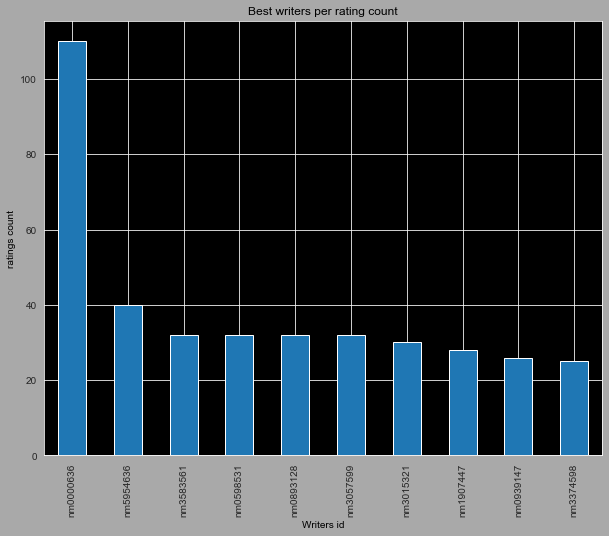

In [84]:
fig,ax= plt.subplots(figsize= (10, 8))
movie_rating_writers.person_id.value_counts().head(10).plot.bar()
plt.xlabel("Writers id", color="black")
plt.ylabel("ratings count", color="black")
plt.title("Best writers per rating count", color="black")
ax.set_facecolor("black")
fig.patch.set_facecolor("darkgrey")
plt.show()

In [85]:
movie_rating_writers.person_id.value_counts()

nm0000636    110
nm5954636     40
nm3583561     32
nm0598531     32
nm0893128     32
            ... 
nm1461822      1
nm5716972      1
nm4965960      1
nm1937987      1
nm1320871      1
Name: person_id, Length: 76243, dtype: int64

In [86]:
#finding mean of ratings
print("The average rating of movies is : ", mean(movie_rating_writers.average_rating))

The average rating of movies is :  6.200205628866582


In [87]:
#finding correlation between columns
movie_rating_writers.person_id.corr(movie_rating_writers.average_rating, method="spearman")

0.07168746933114539

Data analysis for the movie_basics_rating

In [88]:
movie_basics_rating.head()

,movie_id,average_rating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [89]:
#finding number of genres
movie_basics_rating.genres.value_counts().head()

Drama           10189
Documentary      9149
Comedy           4604
Comedy,Drama     2451
Horror           2232
Name: genres, dtype: int64

In [90]:
movie_basics_rating.runtime_minutes.value_counts().head()

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
Name: runtime_minutes, dtype: int64

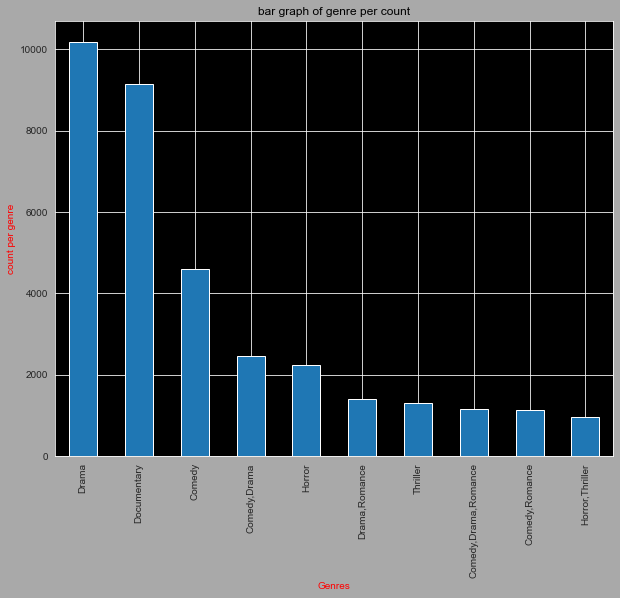

In [91]:
#barchart for genre of movies
fig, ax= plt.subplots(figsize= (10, 8))
movie_basics_rating.genres.value_counts().head(10).plot.bar()
plt.xlabel("Genres", color="red")
plt.ylabel("count per genre", color="red")
plt.title("bar graph of genre per count", color="black")
ax.set_facecolor("black")
fig.patch.set_facecolor("darkgrey")
plt.show()

In [92]:
#correlation between columns
movie_basics_rating.genres.corr(movie_basics_rating.average_rating, method="spearman")

-0.06043194510496815

In [93]:
movie_basics_rating.genres.corr(movie_basics_rating.runtime_minutes, method="spearman")

-0.043908603906984915

In [94]:
movie_basics_rating.average_rating.corr(movie_basics_rating.numvotes, method="spearman")

-0.24650998938756116